# 分类——从决策树开始

## 分类
`分类（Classification）`:利用一个分类函数（又称`分类模型`、`分类器`），该模型能把数据映射到给定类别中的一个类,预测的变量`y`是离散的，预测的结果是否属于某一个类(例如：正确或错误)。分类任务就是确定对象属于哪个预定义的目标类。  
生活中很多分类的例子： 
* 例1：判断邮件是否是垃圾邮件
* 例2：根据核磁共振的结果判断肿瘤是良性的还是恶性的
* 例3：信用卡交易是正常消费还是欺诈?
* 例4：手写数字识别
* 例5：对新闻进行分类：体育、财经、军事….
* 例6：预测天气

分类问题是监督学习的一个核心问题。  
监督学习从数据中学习一个分类决策函数或分类模型，称为`分类器（classifier）`
* 分类器对新的输入进行输出的预测，这个过程称为分类。
* 学习与分类两个过程

## 分类的评价指标
* 分类问题常用的评价指标是`精确率`（precision）与`召回率`（recall）
    * 精确率定义为：$P=\frac{TP}{TP+FP}$
    * 召回率定义为：$R=\frac{TP}{TP+FN}$
        * TP-将正类预测为正类数
        * FN-将正类预测为负类数
        * FP-将负类预测为正类数
        * TN-将负类预测为负类数
* 另外，`F值`：是精确率和召回率的调和均值，即$F=\frac{2PR}{P+R}$,当精确率和召回率都高时候，`F值`也会高。

## 决策树
* 决策树(decision tree)是一种基本的分类与回归方法
* 决策树模型呈树形结构
* 决策树模型可以认为是if-then
* 决策树模型也可以认为是定义在特征空间与类空间上的条件概率分布
* 优点：分类速度快、模型可读性好

### 决策树模型

决策树：分类决策树模型是一种描述对实例进行分类的树形结构。
* 由结点和有向边组成
* 结点类型：内部结点（internal node）和叶结点(leaf node)
    * 内部结点：表示一个特征或属性，只有一条入边和多条出边
    * 叶结点：表示一个类，有一条入边，但是没有出边
    
![决策树示例](img/ds.png)
* 从决策树的根节点到叶结点的每一条路径构成一条规则
    * 路径中内部结点对应着规则的条件
    * 叶结点的类对应规则的结论
* 例如：$ if 体温=恒温 &&胎生=是 then 该动物是哺乳动物 

### 决策树学习的步骤

决策树学习包括三个步骤：  
* 特征选择
* 决策树的生成
* 决策树的剪枝

### 应用模型

![应用模型](img/dsmodel.png)

如何训练得到以下决策树：

![决策树示例](img/dt.png)

得到决策树后，可以进行预测：

![决策树预测](img/dt2.png)

### 决策树学习——特征选择
有很多决策树学习算法：
* Hunt’s Algorithm (one of the earliest)
* CART
* ID3, C4.5
* SLIQ,SPRINT

大都是采用贪心策略——根据最优化某种标准的属性测试进行记录划分。属性划分的问题是：
* 确定如何划分记录?
    * 如何指定属性测试条件？
    * 如何确定最优划分？
* 如何确定何时停止划分？

特征选择在于选取对训练数据具有分类能力的特征:
* 特征选择决定用哪个特征划分特征空间
* 可以提高决策树学习的效率
* 如果一个特征进行分类的结果与随机分类的结果没有很大的差别，则这个特征没有分类能力
——这种特征扔掉对分类的精度没有太大影响！

问题：如何选择最优特征进行分类？

### 示例
![示例](img/loan.png)
  问题：希望通过所给的训练数据学习一个贷款申请的决策树，用以对未来的贷款申请进行分类，即当新的客户提出贷款申请时，根据申请人的特征利用决策树决定是否批准贷款申请。  
       首先，对数据集集合的属性进行标注。  
           年龄：0-青年 1-中年 2-老年  
           有工作：0-否 1-是  
           有自己的房子：0-否  1-是  
           信贷情况：0-一般 1-好 2-非常好  
           类别（是否放贷）：no-否 yes-是  

### 特征选择——信息增益
![年龄特征](img/age.png)
![工作特征](img/work.png)
![房子特征](img/housef.png)
选择哪个特征划分最好？————利用信息增益  

`定义1 熵(entropy)`:表示随机变量不确定性的度量。
假如`X`是一个取有限个值的离散随机变量,概率分布为$P(X=x_i)=p_i,i=1,2…,n$
熵的定义为：  
$$H(X)=-\sum_{i=1}^{n}p_ilogp_i$$
其中，
* $p_i=0$,  $0log0=0$
* 公式中的对数底数取`2`或`e`,熵的单位分别为比特或纳特
* 熵只依赖于`X`的分布，与`X`的取值无关
* 熵的值越大，表示随机变量的不确定也越大

例如:$P(X=1)=p$，$P(X=0)=1-p$,则：$H(X)=-plog_2p-(1-p)log_2(1-p)$
* 当$p=0$或$p=1$时，$H(p)=0$,表示随机变量完全没有不确定性
* 当$p=0.5$，熵取值最大，随机变量不确定性最大
![熵](img/entropy.png)

`定义2 条件熵(Conditional entropy)` $H(Y|X)$:在随机变量`X`的条件下随机变量`Y`的不确定性。定义为`X`给定条件下`Y`的条件概率分布的熵对X的数学期望
$$H(Y|X)=\sum_{i=1}^np_iH(Y|X=x_i)=-\sum_{x\in X}\sum_{y\in Y}p(x,y)logp(y|x)$$

`定义3 联合熵(Joint entropy)` $H(XY)$:两个随机变量同时发生的不确定度。
$$H(XY)=\sum_{(x,y)}p(x,y)logp(x,y)=H(X)+H(Y|X)$$

`定义4  信息增益(Information gain)`：表示得知`X`的信息而使得类`Y`的信息的不确定性减少的程度。
* 特征`A`对于数据集`D`的信息增益`g(D,A)`：集合`D`的经验熵`H(D)`与给定特征`A`条件下`D`的经验条件熵`H(D|A)`之差，即：
$$g(D,A)=H(D)-H(D|A)$$

* 熵`H(Y)`与条件熵`H(Y|X)`之差称为`互信息(mutual information)`
* 决策树学习中的信息增益等价于训练数据集中类与特征的互信息。

#### 信息增益算法
已知，训练集`D`，`|D|`表示其样本容量
设有`K`个类$C_k$，$k=1,2…K$,$|C_k|$类$C_k$的样本个数，即：
$$\sum_{k=1}^{K}|C_k|=|D|$$
设特征$A$有`n`个不同的取值${a_1,a_2,…,a_n}$.根据特征`A`的取值将`D`划分为`n`个子集$D_1,D_2…D_n$,$|D_i|$为$D_i$的样本个数，即：
$$\sum_{i=1}^{n}|D_i|=|D|$$
子集$D_i$中属于类$C_k$的样本个集合为$D_{ik}$,即：$D_{ik}=D_i∩C_i$, $|D_{ik}|$为$D_{ik}$的样本个数

(1)计算数据集`D`的经验熵`H(D)`
$$H(D)=-\sum_{k=1}^{K}\frac{|C_k|}{|D|}log_2\frac{|C_k|}{D}$$
(2)计算特征`A`对数据集`D`的经验条件熵`H(D|A)`
$$H(D|A)=\sum_{i=1}^{n}\frac{|D_i|}{|D|}H(D_i)=-\sum_{i=1}^{n}\frac{|D_i|}{|D|}\sum_{k=1}^{K}\frac{|D_{ik}|}{|D_i|}log_2\frac{|D_{ik}|}{|D_i|}$$


(3)计算信息增益`g(D,A)`
$$g(D,A)=H(D)-H(D|A)$$

#### 示例
看看贷款的数据集：
![贷款示例](img/loan.png)
(示例来自于李航《统计学习方法》)  
（1）计算经验熵`H(D)`
$$H(D)=-\frac{9}{15}log_2\frac{9}{15}-\frac{6}{15}log_2\frac{6}{15}=0.971$$
（2）计算各个特征的信息增益:
令 $A_1=年龄$,$A_2=有工作$,$A_3=有房子$,$A_4=信贷情况$  
* 对于$A_1$:  
$$g(D,A_1)=H(D)-H(D|A_1)=H(D)-[\frac{5}{15}H(D_1)+\frac{5}{15}H(D_2)+\frac{5}{15}H(D_3)$$
$$H(D_1)=-\frac{2}{5}log_2\frac{2}{5}-\frac{3}{5}log_2\frac{3}{5}$$
$$H(D_2)=-\frac{3}{5}log_2\frac{3}{5}-\frac{2}{5}log_2\frac{2}{5}$$
$$H(D_3)=-\frac{4}{5}log_2\frac{4}{5}-\frac{1}{5}log_2\frac{1}{5}$$
$$g(D,A_1)=0.971-0.888=0.083$$
其中$D_1$，$D_2$，$D_3$分别表示$A_1$取青年、中年和老年时的样本子集。
* 对于$A_2$:
$$g(D,A_2)=H(D)-H(D|A_2)=H(D)-[\frac{5}{15}H(D_1)+\frac{10}{15}H(D_2)]$$
$$H(D_1)=0$$
$$H(D_2)=-\frac{4}{10}log_2\frac{4}{10}-\frac{6}{10}log_2\frac{6}{10}$$
则，$$g(D,A_1)=0.971-0.647=0.324$$
其中$D_1$，$D_2$分别表示示$A_2$取是、否时候的样本子集。
* 对于$A_3$:
$$g(D,A_3)=H(D)-H(D|A_3)=H(D)-[\frac{6}{15}*0+\frac{9}{15}(-\frac{3}{9}log_2\frac{3}{9}-\frac{6}{9}log_2\frac{6}{9})]=0.971-0.551=0.420$$
其中，$D_1$，$D_2$分别表示示$A_3$取是、否时候的样本子集。
* 对于$A_4$:
$$g(D,A_4)=H(D)-H(D|A_4)=0.971-0.608=0.363$$

(3)选择信息增益最大的特征
$$g(D,A_1)=0.083$$
$$g(D,A_2)=0.324$$
$$g(D,A_3)=0.420$$
$$g(D,A_4)=0.363$$
则，特征$A_3$（有自己的房子）是最优分类特征

Note: 用信息增益作为划分训练集的特征，存在偏向于选择取值较多的特征
解决办法：利用`信息增益比`

`定义  信息增益比(information gain ratio)`:特征`A`对训练数据集`D`的信息增益比$g_R(D,A)$定义为信息增益$g(D,A)$与训练集`D`关于特征`A`的值的熵`HA(D)`之比，即：
$$g_R(D,A)=\frac{g(D,A)}{H_A(D)}$$
$$H_A(D)=-\sum_{i=1}^{n}\frac{|D_i|}{|D|}log_2\frac{|D_i|}{|D|}$$

#### 课后自行练习：
利用上例的训练集`D`，计算各特征的信息增益比。

### 停止分裂的条件
* 决策树不可能不限制地生长，为了降低决策树复杂度和提高预测的精度，会适当提前终止节点的分裂。
* 停止分裂的一般性条件：
    * 最小结点数
        * 当节点的数据量小于一个指定的数量时，不继续分裂。两个原因：一是数据量较少时，再做分裂容易强化噪声数据的作用；二是降低树生长的复杂性。
        * 提前结束分裂一定程度上有利于降低过拟合的影响。
    * 熵或者基尼值小于阈值
        * 熵和基尼值的大小表示数据的复杂程度，当熵或者基尼值过小时，表示数据的纯度比较大，如果熵或者基尼值小于一定程度数，节点停止分裂。
    * 决策树的深度达到指定的条件
    * 所有特征已经停止使用完毕，不能继续进行分裂：被动式停止分裂的条件，当已经没有可分的属性时，直接将当前节点设置为叶子节点。
    * 决策树的深度达到指定的条件
         * 节点的深度可以理解为节点与决策树根节点的距离，决策树的深度是所有叶子节点的最大深度，当深度到达指定的上限大小时，停止分裂。

### 决策树生成
决策树生成的经典算法：
* `ID3`算法
* `C4.5`算法
两个算法不同点是特征选择的度量不一样:`ID3`采用信息增益来选择，`C4.5`采用信息增益比来选择

#### ID3算法
ID3算法
* 思路：利用信息增益准则选择特征，递归建树。
* 方法：
    * 从根节点开始，计算所有可能的信息增益
    * 选择信息增益最大的特征作为结点的特征，由该特征的不同取值建立子节点；
    * 再对子节点递归调用以上步骤，建立决策树；
    * 终止条件：所有特征的信息增益均很小或没有特征可以选择
* 算法描述：
    <hr/>
     算法：$ID3$算法  
    <hr/>
    输入：训练集$D$，特征集$A$，阈值$Ԑ$   
    
    输出：决策树 
    
    `Step 1`  若`D`中所有实例属于同一类$C_k$，则`T`为单结点树，类$C_k$作为$T$的类标记，返回$T$；    
    
    `Step 2`  若$A$为空，则$T$为单结点树，并将$D$中数量最多的类$C_k$作为该结点的类，返回$T$    
    
    `Step 3` 否则，计算A中各特征的对`D`的信息增益，选择信息增益最大的特征$A_g$;
    
    `Step 4` 如果$A_g$信息增益小于阈值`Ԑ`,则置`T`为单结点树，将`D`中数量最多的类作为该结点的类标记，返回`T`；  
    
    `Step 5` 否则，对$A_g$的每一个可能值$a_i$,依$A_g=a_i$将$D$分隔成若干个非空子集$D_i$,将$D_i$中实例数最大的类作为标记，构建子节点，由结点及其子结点构成树`T`，返回`T`；  
    
    `Step 6` 对第`i`个子结点，以$D_i$为训练集，以$A-{A_g}$为特征集，递归调用`Step1~Step5`，得到子树$T_i$,返回$T_i$  
    <hr/>

示例：
![贷款示例](img/loantree.png)

## 决策树实践

通过前面放贷的例子介绍决策树实践.

#### 1、创建数据集，返回数据集合dataSet和特征名称的集合label

In [1]:

#coding=utf-8

def createDataSet():
    #数据集,也可以将数据集放到文件中，从文件读入
    '''
    dataSet = [['青年', '否', '否', '一般', 'no'],
            ['青年', '否', '否', '好', 'no'],
            ['青年', '是', '否', '好', 'yes'],
            ['青年', '是', '是', '一般', 'yes'],
            ['青年', '否', '否', '一般', 'no'],
            ['中年','否', '否', '一般', 'no'],
            ['中年', '否', '否', '好', 'no'],
            ['中年', '是', '是', '好', 'yes'],
            ['中年', '否', '是', '非常好', 'yes'],
            ['中年', '否', '是', '非常好', 'yes'],
            ['老年', '否', '是', '非常好', 'yes'],
            ['老年', '否', '是', '好', 'yes'],
            ['老年', '是', '否', '好', 'yes'],
            ['老年', '是', '否', '非常好', 'yes'],
            ['老年', '否', '否', '一般', 'no']]
    labels = ['年龄', '有工作', '有自己的房子', '信贷情况']
    '''
    dataSet=[[0, 0, 0, 0, 'no'],
            [0, 0, 0, 1, 'no'],
            [0, 1, 0, 1, 'yes'],
            [0, 1, 1, 0, 'yes'],
            [0, 0, 0, 0, 'no'],
            [1, 0, 0, 0, 'no'],
            [1, 0, 0, 1, 'no'],
            [1, 1, 1, 1, 'yes'],
            [1, 0, 1, 2, 'yes'],
            [1, 0, 1, 2, 'yes'],
            [2, 0, 1, 2, 'yes'],
            [2, 0, 1, 1, 'yes'],
            [2, 1, 0, 1, 'yes'],
            [2, 1, 0, 2, 'yes'],
            [2, 0, 0, 0, 'no']]
    # 特征名称
    labels = ['年龄', '有工作', '有自己的房子', '信贷情况']
    return dataSet, labels

In [2]:
ds,labels=createDataSet()
print(ds)
print(labels)

[[0, 0, 0, 0, 'no'], [0, 0, 0, 1, 'no'], [0, 1, 0, 1, 'yes'], [0, 1, 1, 0, 'yes'], [0, 0, 0, 0, 'no'], [1, 0, 0, 0, 'no'], [1, 0, 0, 1, 'no'], [1, 1, 1, 1, 'yes'], [1, 0, 1, 2, 'yes'], [1, 0, 1, 2, 'yes'], [2, 0, 1, 2, 'yes'], [2, 0, 1, 1, 'yes'], [2, 1, 0, 1, 'yes'], [2, 1, 0, 2, 'yes'], [2, 0, 0, 0, 'no']]
['年龄', '有工作', '有自己的房子', '信贷情况']


In [3]:
lst = ['你好','谢谢']

#### 2、特征选择——信息增益

In [4]:
from math import log
"""
Function Description：计算给定数据集的熵

Parameters:
   dataSet-数据集
Returns:
   ent-经验熵
Author:
   Double Liang
Create Date:
    2019-10-06
Version:
    V1.0
"""
def entropy(dataSet):
    #数据集的行数
    numberOfData = len(dataSet)
    #定义字典存放各类的计数
    labelCount = {}
    #遍历数据集，对每一类进行计数
    for row in dataSet:
        #最后一列是类属性
        label = row[-1]
        #判断当前类在字典是否存在，不存在初始化当前类
        if label not in labelCount.keys():
            labelCount[label] = 0
        #计数
        labelCount[label] = labelCount[label] + 1
        
    ent = 0.0
    #计算熵
    for key in labelCount:
        prob = float(labelCount[key])/numberOfData
        ent -= prob * log(prob, 2)
        
    return ent

In [5]:
print(entropy(ds))

0.9709505944546686


#### 计算信息增益
计算信息增益，需要对按选定特征的每个值对数据集进行划分，然后分别计算对应每个值的条件概率，因此需要定义一个函数对数据集进行划分。

In [6]:
"""
Function Description:按给定特征划分数据
Parameters:
    dataSet-待划分的数据集
    col-划分数据的特征
    value-对应的特征值
Returns:
    划分后的数据集
Author:
    Double Liang
Create Date:
    2019-10-06
Version:
    V1.0
"""
def splitDataSet(dataSet, col, value):
    resultDs = []
    #遍历数据集
    for row in dataSet:
        #当前行指定特征的值
        if row[col] == value:
                #去掉当前特征
                reduceFeatureRow = row[:col]
                reduceFeatureRow.extend(row[col+1:])
                #将符合条件的值放入到返回的结果集中
                resultDs.append(reduceFeatureRow)
    return resultDs

选择最优特征的过程是遍历每一个特征，计算每个特征的信息增益，信息增益最大的特征即为最优特征

In [7]:
"""
Function Description:选择最优特征
Parameters:
    dataSet-数据集
    features-特征的集合
Returns:
    最优特征对应的列号
Author:
    Double Liang
Create Date:
    2019-10-06
Version:
    V1.0
"""
def chooseBestFeature(dataSet, features):
    #数据集中的特征个数
    numberOfFeature = len(dataSet[0]) - 1
    #数据集中数据行的数目
    numberOfDataRows = len(dataSet)
    #调用求熵的函数entropy来求得数据集的经验熵
    origEntropy = entropy(dataSet)
    
    #定义一个变量记录最大的信息增益
    maxInfoGain = 0.0
    
    #存储最优的选择的特征
    selectFeature = -1
    
    #遍历每一个特征,求每个特征的信息增益
    for i in range(numberOfFeature):
        
        #当前特征的所有取值
        featureLst = [row[i] for row in dataSet]
        
        #转成set,去重
        uniqueFeatureSet = set(featureLst)
        newEntropy = 0.0
        
        #遍历当前特征的每一个值，求给定当前特征下的条件熵
        for value in uniqueFeatureSet:
            #划分数据集
            splitDs = splitDataSet(dataSet, i, value)
            #求当前取值的概率
            prob = len(splitDs) / numberOfDataRows
            #求条件熵
            newEntropy += prob * entropy(splitDs)
        
        #计算信息增益
        infoGain = origEntropy - newEntropy
        
        #输出当前特征的信息增益
        print("第%d特征(%s)的信息增益是%.3f" % (i, features[i], infoGain))
        
        #找最大的信息增益
        if (infoGain > maxInfoGain):
            maxInfoGain = infoGain
            selectFeature = i
        
    #返回最优特征    
    return selectFeature  

In [8]:
print("最优特征索引值:" + str(chooseBestFeature(ds, labels)))

第0特征(年龄)的信息增益是0.083
第1特征(有工作)的信息增益是0.324
第2特征(有自己的房子)的信息增益是0.420
第3特征(信贷情况)的信息增益是0.363
最优特征索引值:2


####  3、创建决策树

In [9]:
"""
Function Description:统计数量最多类
Parameters:
    classList-类的集合
Returns:
    数据最多的类
Author:
    Double Liang
Create Date:
    2019-10-06
Version:
    V1.0
"""
def getLabelOfMajor(classList):
    #统计classList中每个元素出现的次数
    classCount = {}
    #遍历每一个类别，统计数量
    for label in classList:                                        
        if label not in classCount.keys():
            classCount[label] = 0   
        classCount[label] += 1
    #根据字典的值进行降序排列
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)
    #第一个就是数量最多的类别
    return sortedClassCount[0][0]   

#### 设计递归算法建立决策树 

In [10]:
"""
Function Description:递归算法建立决策树
Parameters:
    dataSet-数据集
    labels-特征集合
    featLabels - 存储选择的最优特征标签
Returns:
    创建好的决策树结构
Author:
    Double Liang
Create Date:
    2019-10-06
Version:
    V1.0
"""
def createTree(dataSet, labels, featureLabels):
    #取分类标签(是否放贷:yes or no)
    classList = [row[-1] for row in dataSet] 
    #结束递归的条件：如果类别完全相同则停止继续划分
    if classList.count(classList[0]) == len(classList):         
        return classList[0]
    #遍历完所有特征时返回出现次数最多的类标签
    if len(dataSet[0]) == 1:                                   
        return getLabelOfMajor(classList)
    
    #调用特征选择函数，选择最优特征
    bestFeature = chooseBestFeature(dataSet, labels)
    bestFeatureLabel = labels[bestFeature]                            
    featureLabels.append(bestFeatureLabel)
    
    #根据最优特征的标签生成树
    myTree = {bestFeatureLabel:{}} 
    #删除已经使用特征标签
    del(labels[bestFeature])          
    #得到训练集中所有最优特征的属性值
    featureValues = [row[bestFeature] for row in dataSet]      
    #去掉重复的属性值
    uniqueValues = set(featureValues)
    #遍历特征，创建决策树
    for value in uniqueValues:                                                           
        myTree[bestFeatureLabel][value] = createTree(splitDataSet(dataSet, bestFeature, value), labels, featLabels)
    return myTree

In [11]:
featLabels = []
myTree = createTree(ds, labels, featLabels)
print(myTree)

第0特征(年龄)的信息增益是0.083
第1特征(有工作)的信息增益是0.324
第2特征(有自己的房子)的信息增益是0.420
第3特征(信贷情况)的信息增益是0.363
第0特征(年龄)的信息增益是0.252
第1特征(有工作)的信息增益是0.918
第2特征(信贷情况)的信息增益是0.474
{'有自己的房子': {0: {'有工作': {0: 'no', 1: 'yes'}}, 1: 'yes'}}


#### 4、决策树可视化 （可选）

In [12]:
# -*- coding: UTF-8 -*-
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
from math import log
import operator

In [13]:
"""
Function Description:获得叶子结点的数目
Parameters:
    tree-决策树
Returns:
    叶子结点的个数
Author:
    Double Liang
Create Date:
    2019-10-06
Version:
    V1.0
"""
def getCountOfLeaf(tree):
    count = 0
    #遍历字典
    firstFeature = next(iter(tree))
    secondDic = tree[firstFeature]
    for key in secondDic.keys():
        #如果当前结点的value类型仍然是一个字典，递归调用求结点的数目
        if type(secondDic[key]).__name__ == "dict":
            count += getCountOfLeaf(secondDic[key])
        else: #否则是叶子结点，结点数目加1
            count += 1
    return count

In [14]:
"""
Function Description:获得决策树的深度
Parameters:
    tree-决策树
Returns:
    决策树的深度
Author:
    Double Liang
Create Date:
    2019-10-06
Version:
    V1.0
"""
def getTreeDepth(tree):
    maxDepth = 0
    firstFeature = next(iter(tree))
    secondDic = tree[firstFeature]
    for key in secondDic.keys():
        if type(secondDic[key]).__name__ == "dict":
            depth = 1 + getTreeDepth(secondDic[key])
        else:
            depth = 1
        if depth > maxDepth:
            maxDepth = depth
    return maxDepth

In [29]:
"""
Function Description:绘制结点
Parameters:
    node-结点
    position:位置
    parent:父亲结点
    noteType:结点的类型
Returns:
    无
Author:
    Double Liang
Create Date:
    2019-10-06
Version:
    V1.0
"""
def drawNode(node, position, parent, nodeType):
    #定义箭头格式
    arrow_args = dict(arrowstyle="<-")     
    #设置中文字体
    font = FontProperties(fname=u"C:\Windows\Fonts\仿宋_Gb2312.ttf", size=14)  
    #绘制结点
    createPlot.ax1.annotate(node, xy=parent,  xycoords='axes fraction',    
        xytext=position, textcoords='axes fraction',
        va="center", ha="center", bbox=nodeType, arrowprops=arrow_args, FontProperties=font)

In [30]:
"""
Function Description:标注边的属性值
Parameters:
    cntrPt-当前结点
    parentPt:父亲结点
    txtString:标注的属性值
Returns:
    无
Author:
    Double Liang
Create Date:
    2019-10-06
Version:
    V1.0
"""
def plotMidText(cntrPt, parentPt, txtString):
    #计算标注位置 
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]                     
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    font = FontProperties(fname=u"C:\Windows\Fonts\仿宋_Gb2312.ttf", size=14)   
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)


In [31]:
"""
Function Description:绘制决策树
Parameters:
    myTree-决策树
    parentPt:父亲结点
    noteTxt:结点文本
Returns:
    无
Author:
    Double Liang
Create Date:
    2019-10-06
Version:
    V1.0
"""
def plotTree(myTree, parentPt, nodeTxt):
    #设置结点格式
    decisionNode = dict(boxstyle="sawtooth", fc="0.8")    
    #设置叶结点格式
    leafNode = dict(boxstyle="round4", fc="0.8")  
    #获取决策树叶结点数目，决定了树的宽度
    numLeafs = getCountOfLeaf(myTree)    
    #获取决策树深度
    depth = getTreeDepth(myTree)         
    #下个字典
    firstStr = next(iter(myTree))    
    #中心位置
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)   
    #标注有向边属性值
    plotMidText(cntrPt, parentPt, nodeTxt)       
     #绘制结点
    drawNode(firstStr, cntrPt, parentPt, decisionNode)
    #下一个字典，继续绘制子结点
    secondDict = myTree[firstStr]       
    #y偏移
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD                                       
    for key in secondDict.keys():  
         #测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
        if type(secondDict[key]).__name__=='dict':  
            #不是叶结点，递归调用继续绘制
            plotTree(secondDict[key],cntrPt,str(key))                                        
        else:              
            #如果是叶结点，绘制叶结点，并标注有向边属性值                                             
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW

            drawNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD

In [32]:
"""
Function Description:创建绘制面板
Parameters:
    inTree-决策树
Returns:
    无
Author:
    Double Liang
Create Date:
   2019-10-06
Version:
    V1.0
"""
def createPlot(inTree):
    #创建fig
    fig = plt.figure(1, facecolor='white') 
    #清空fig
    fig.clf()                                                                               
    axprops = dict(xticks=[], yticks=[])
    #去掉x、y轴
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)   
    #获取决策树叶结点数目
    plotTree.totalW = float(getCountOfLeaf(inTree))  
    #获取决策树层数
    plotTree.totalD = float(getTreeDepth(inTree)) 
    #计算x偏移
    plotTree.xOff = -0.5/plotTree.totalW
    plotTree.yOff = 1.0 
    #绘制决策树
    plotTree(inTree, (0.5,1.0), '')     
    #显示绘制结果
    plt.show()   

第0特征(年龄)的信息增益是0.083
第1特征(有工作)的信息增益是0.324
第2特征(有自己的房子)的信息增益是0.420
第3特征(信贷情况)的信息增益是0.363
第0特征(年龄)的信息增益是0.252
第1特征(有工作)的信息增益是0.918
第2特征(信贷情况)的信息增益是0.474
{'有自己的房子': {0: {'有工作': {0: 'no', 1: 'yes'}}, 1: 'yes'}}


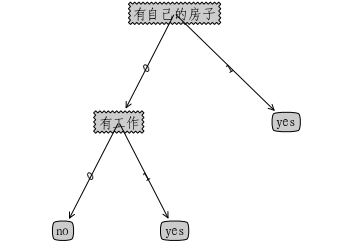

In [33]:
dataSet, labels = createDataSet()
featLabels = []
tree = createTree(dataSet, labels, featLabels)
print(tree)  
createPlot(tree) 

#### 5、利用决策树进行预测分类
训练好决策树后，需要利用决策树来对新的数据进行预测，也就是将新的数据在决策树上进行搜索的过程，一直搜索到叶子结点，也就获得了该数据的类别信息，可以采用递归的思想来进行在树熵搜索。

In [ ]:
"""
Function Description:利用决策树来预测类别
Parameters:
    tree-训练好的决策树
    featLabels:存储选择的最优特征标签
    testVec:测试数据
Returns:
    返回测试数据的类别信息
Author:
    Double Liang
Create Date:
    2019-10-06
Version:
    V1.0
"""
def classify(tree, featLabels, testVec):
    #获取决策树结点
    firstStr = next(iter(tree))  
    #下一个字典
    secondDict = tree[firstStr]                                                       
    
    #获取当前特征的序号
    featIndex = featLabels.index(firstStr)
    
    #遍历每一个特征的属性值
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            #如果仍然是字典，则继续递归调用去遍历
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key], featLabels, testVec)
            else: classLabel = secondDict[key]  # 否则就找到该类别信息
    return classLabel

In [ ]:
testVec = [0,1,0,2]                                        #测试数据
result = classify(tree, featLabels, testVec)
if result == 'yes':
    print('当前数据的类别是：放贷')
if result == 'no':
    print('当前数据的类别是：不放贷')

#### 6、决策树的存储
构造决策树是很耗时的任务，如果数据集很大，将会耗费很多计算时间。然而用创建好的决策树解决分类问题，则可以很快完成。因此，为了节省计算时间，最好能够在每次执行分类时调用已经构造好的决策树。  
为了解决这个问题，需要使用Python模块<b>pickle</b>序列化对象。序列化对象可以在磁盘上保存对象，并在需要的时候读取出来。

In [ ]:
# -*- coding: UTF-8 -*-
import pickle
"""
Function Description:存储决策树
Parameters:
    tree-训练好的决策树
    filename:存储的文件名
Returns:
    无
Author:
    Double Liang
Create Date:
    2019-10-06
Version:
    V1.0
"""
def storeTree(tree, filename):
    with open(filename, 'wb') as fw:
        pickle.dump(tree, fw)

In [ ]:
storeTree(tree, 'tree.txt')

#### 读取存储好的决策树

In [ ]:
"""
Function Description:读取决策树
Parameters:
    filename:决策树的存储文件名
Returns:
    决策树字典
Author:
    Double Liang
Create Date:
    2019-10-06
Version:
    V1.0
"""
def readTree(filename):
    fr = open(filename, 'rb')
    return pickle.load(fr)

In [ ]:
myTree = readTree('tree.txt')
print(myTree)

In [ ]:
testVec = [0,1,0,2]  #测试数据
result = classify(myTree, featLabels, testVec)
if result == 'yes':
    print('当前数据的类别是：放贷')
if result == 'no':
    print('当前数据的类别是：不放贷')

## 课后练习

#### 一、Step by Step编程实现决策树，掌握决策树分类的原理
#### 二、利用一些机器学习包或平台实现决策树，例如：sklearn包
参考官方文档：http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### 心得
#### <font color='red'>书上得来终觉浅，绝知此事要躬行</font>
#### 对于一件事情，需要不断的重复做，直到很熟练为止.....编程就是这样的一件事情，没有任何技巧和捷径